# Trabalho 2

* Aluno : Gabriel Borin Macedo
* RA : 197201

## Descrição do trabalho

## Parte 0 : criação de função úteis para o programa

Inicialmente, será definido algumas funções úteis para este _notebook_

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

from glob import glob


def read_images(images_path: list[str]) -> tuple[list, list]:
    """
    Função que realiza a leitura de imagens no diretório e retorna uma tupla de lista que contém
    respectivamente as imagens monocromáticas e no padrão RGB

    Args:
        images_path (list[str]): lista de strings que contém o caminho para leitura de todas as imagens

    Notes:
        esse código foi baseado neste (https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#:~:text=The%20conversion%20from%20a%20RGB,done%20with%20cv%3A%3AmixChannels.)

    Returns (tuple[list, list]):
        retorna uma tupla que contém respectivamente as imagens monocromáticas e no padrão RGB

    """

    gray_images_vec = []
    rgb_images_vec = []

    for img_path in images_path:
        print("Lendo a imagem de nome {}".format(img_path))

        # Estamos lendo a imagem em BGR e depois convertendo para RGB
        img_rgb = cv2.imread(img_path)[..., ::-1]

        # Fazendo a conversão de RGB para escala de cinza
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

        gray_images_vec.append(img_gray)
        rgb_images_vec.append(img_rgb)

    return gray_images_vec, rgb_images_vec


def plot_figures_in_line(image_rgb: np.ndarray, gray_image: np.ndarray, title1: str = "",
                         title2: str = "", **kwargs: dict) -> None:
    """
    Função que realiza a plotagem de duas imagens na horizontal. Mais precisamente, a imagem colorida é apresentado mais à esquerda
    enquanto que a imagem monocromática é apresentada na direita

    Args:
        image_rgb (np.ndarray): um vetor que representa a imagem na escala rgb
        gray_image (np.ndarray): um vetor que representa a imagem na escala de cinza
        title1 (str): string que representa o título da imagem rgb
        title2 (str): string que representa o título da imagem monocromática
        **kwargs (dict): dicionário que contém os parâmetros de salvar a imagem, o tamanho da figura e se o png será salvo como uma figura transparente

    Returns (None):

    """

    if "save_fig" in kwargs.keys():
        save_fig_name = kwargs.pop("save_fig")
        save_dir = kwargs.pop("save_dir")

    else:
        save_fig_name = ""
        save_dir = ""

    if "figsize" in kwargs.keys():
        figsize_val = kwargs.pop("figsize")

    else:
        figsize_val = (15, 15)

    if "fontsize_title" in kwargs.keys():
        fontsize_title = kwargs.pop("fontsize_title")

    else:
        fontsize_title = 20

    fig, ax = plt.subplots(1, 2, figsize=figsize_val)

    # Plot da imagem rgb
    ax[0].imshow(image_rgb, vmin=image_rgb.min(), vmax=image_rgb.max())
    ax[0].set_title(title1, fontsize=fontsize_title)

    # Plot da imagem em tom de cinza
    ax[1].imshow(gray_img, cmap="gray", vmin=gray_image.min(), vmax=gray_image.max())
    ax[1].set_title(title2, fontsize=fontsize_title)

    for a in ax:
        a.axis('off')
    if save_fig_name:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(save_dir + save_fig_name)

    plt.show()

## Parte 1 : Conversão de imagens no tom de cinza para a escala monocromática

[#TODO] : Preciso escrever a parte teórica deste tópico. Eu deixei _linkado_ na parte da leitura de imagens uma doc de examplo para conversão de rgb para escala monocromática

### Leitura do caminho das imagens

Inicialmente, será definido o caminho para a leitura das imagens utilizando a biblioteca _glob_

In [2]:
image_files_path = sorted(glob("Imagens/*"))
gray_images, rgb_images = read_images(image_files_path)

Lendo a imagem de nome Imagens/objetos1.png
Lendo a imagem de nome Imagens/objetos2.png
Lendo a imagem de nome Imagens/objetos3.png


libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50


### Função para leitura e plotagem das imagens

Agora,será feito uma célula que pega as imagens rgb e em escala de cinza e realiza o _plot_ das imagens

Nome da imagem de entrada : objetos1
Dimensão da imagem monocromática : (327, 563)
Dimensão da imagem rgb : (327, 563, 3)


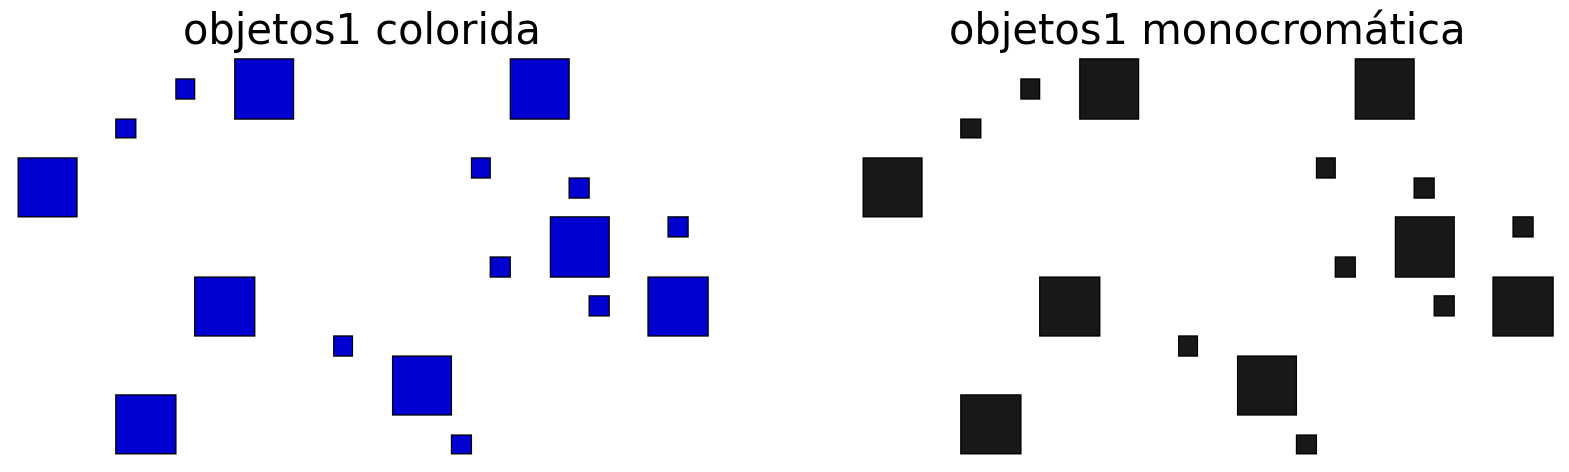

Nome da imagem de entrada : objetos2
Dimensão da imagem monocromática : (343, 563)
Dimensão da imagem rgb : (343, 563, 3)


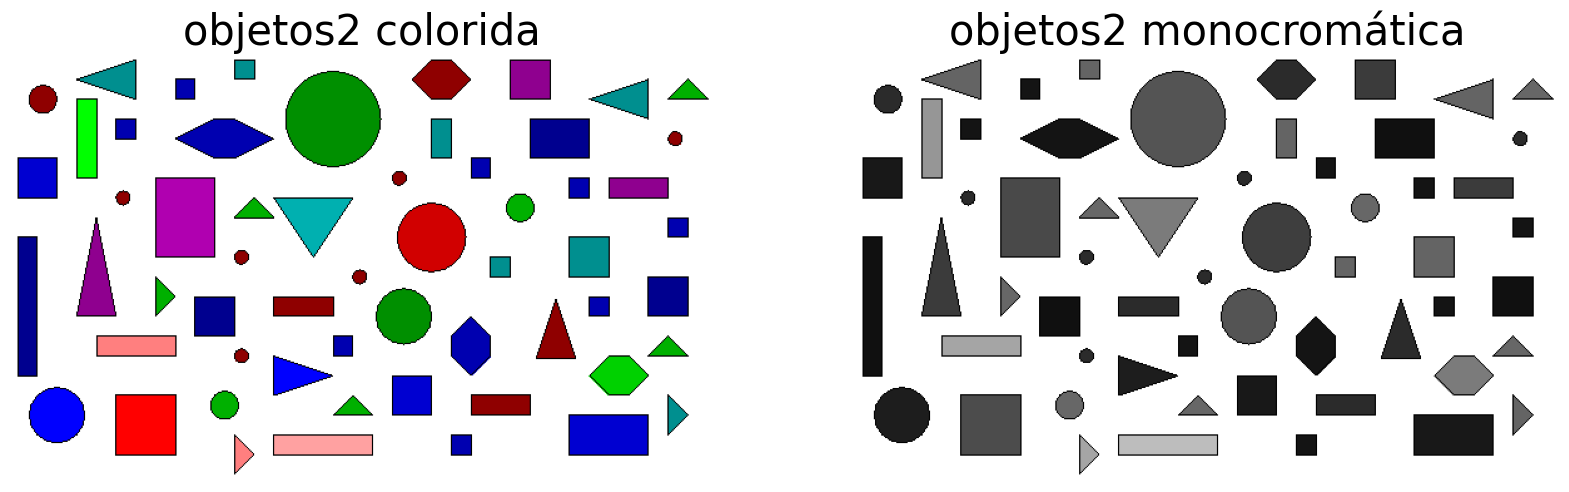

Nome da imagem de entrada : objetos3
Dimensão da imagem monocromática : (238, 238)
Dimensão da imagem rgb : (238, 238, 3)


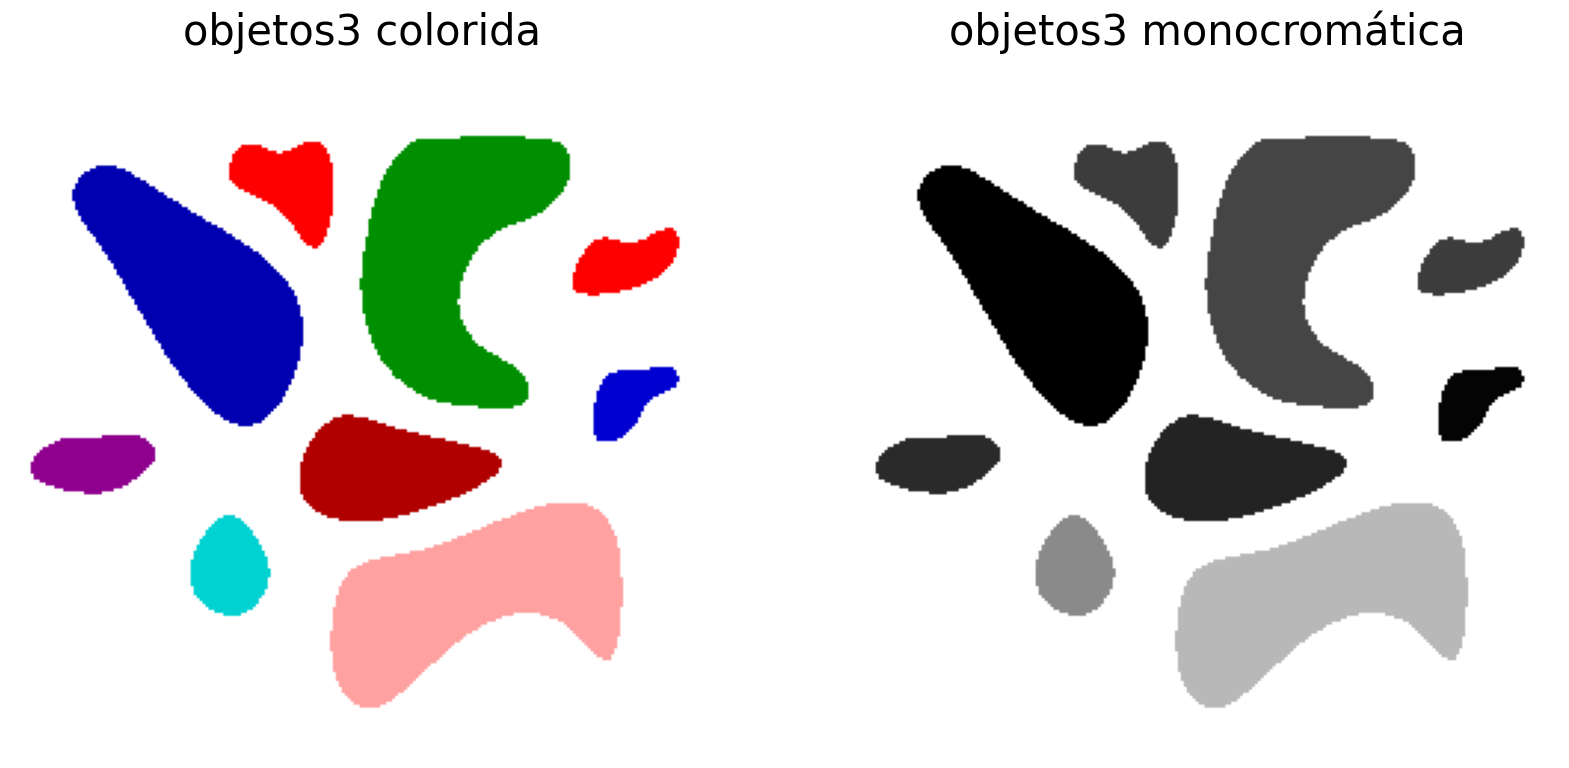

In [3]:
for gray_img, rgb_img, image_name in zip(gray_images, rgb_images, image_files_path):
    # Manipulação da string para se obter
    img_name = image_name.split("/")[-1].split(".")[0]

    print("Nome da imagem de entrada : {}".format(img_name))
    print("Dimensão da imagem monocromática : {}".format(gray_img.shape))
    print("Dimensão da imagem rgb : {}".format(rgb_img.shape))

    plot_figures_in_line(rgb_img, gray_img, title1="{} colorida".format(img_name),
                         title2="{} monocromática".format(img_name),
                         save_dir="ResultadoImagens/ConversaoCores/",
                         save_fig="{}Convertida.png".format(img_name),
                         figsize=(20, 20),
                         fontsize_title=30)

## Parte 2 : Detecção de bordas em imagens
https://scikit-image.org/docs/stable/auto_examples/edges/plot_canny.html
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_metrics.html#sphx-glr-auto-examples-segmentation-plot-metrics-py
https://scikit-image.org/docs/stable/auto_examples/applications/plot_coins_segmentation.html
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_mask_slic.html#sphx-glr-auto-examples-segmentation-plot-mask-slic-py

TODO : Eu preciso achar um melhor colormap para mostrar apenas o contorno dos objetos

Nome da imagem de entrada : objetos1
Dimensão da imagem monocromática : (327, 563)


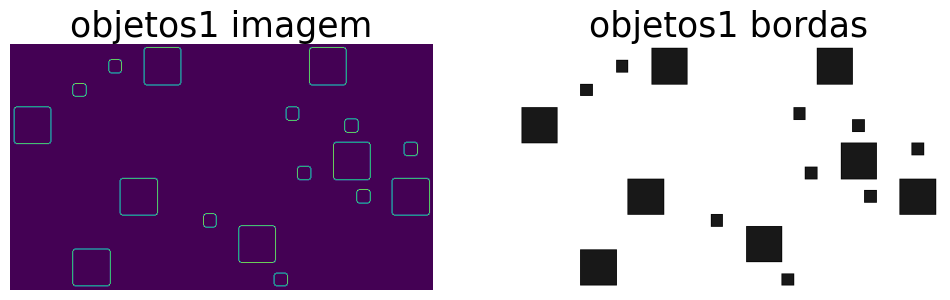

Nome da imagem de entrada : objetos2
Dimensão da imagem monocromática : (343, 563)


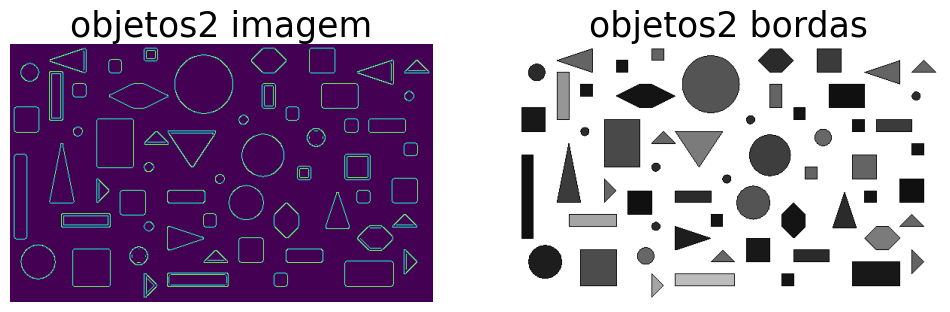

Nome da imagem de entrada : objetos3
Dimensão da imagem monocromática : (238, 238)


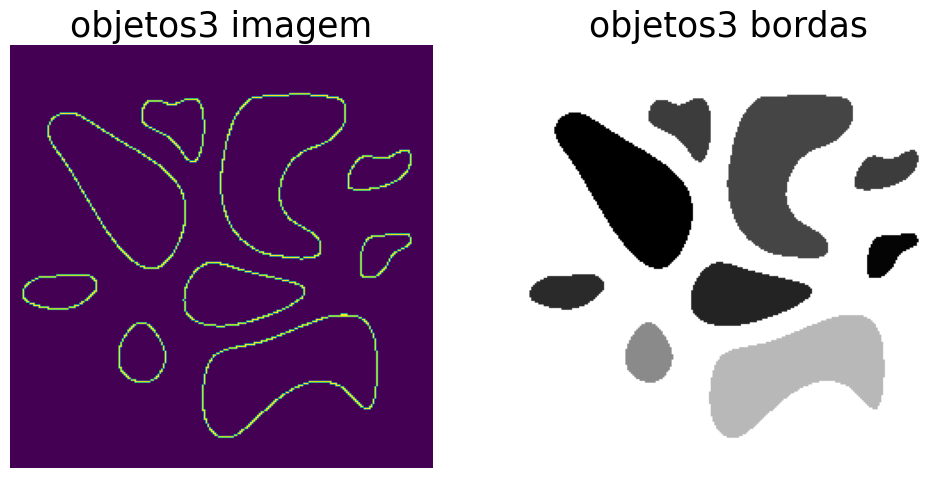

In [4]:
from skimage.feature import canny

for gray_img, image_name in zip(gray_images, image_files_path):
    # Manipulação da string para se obter
    img_name = image_name.split("/")[-1].split(".")[0]

    print("Nome da imagem de entrada : {}".format(img_name))
    print("Dimensão da imagem monocromática : {}".format(gray_img.shape))
    image_edges = canny(gray_img)

    plot_figures_in_line(image_edges, gray_img, title1="{} imagem".format(img_name),
                         title2="{} bordas".format(img_name),
                         save_dir="ResultadoImagens/Contorno/",
                         save_fig="{}Contorno.png".format(img_name),
                         figsize=(12, 12),
                         fontsize_title=25)

## Parte 3 : Extração de propriedades dos objetos.
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html

In [5]:
import pandas as pd

from skimage.measure import label, regionprops, regionprops_table


gray_img = gray_images[2]
label_img = label(gray_img)
regions = regionprops(label_img)

props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'area',
                                                 'perimeter',
                                                 'axis_major_length',
                                                 'axis_minor_length'))

In [6]:
pd.DataFrame(props)

,centroid-0,centroid-1,orientation,area,perimeter,axis_major_length,axis_minor_length
0,120.474336,117.011910,-0.922366,40387,2559.030663,302.750684,292.573707
1,68.511212,147.773998,-0.226852,3969,313.764502,108.828000,62.852573
2,43.972187,94.098609,0.930846,791,119.982756,41.525541,27.879867
3,80.947824,63.039900,0.697963,3584,259.462987,104.357901,45.901414
4,70.457407,206.901852,-1.247312,540,99.254834,39.674902,18.122233
5,116.378995,208.148402,-0.859095,438,88.769553,34.512847,17.846710
6,140.422209,126.641330,-1.559464,1684,174.124892,67.355587,33.426432
7,137.934579,27.618380,-1.459067,642,103.012193,42.565622,19.388141
8,182.719878,156.600407,-1.248842,3934,305.421356,120.989355,49.898998
9,173.379259,73.651852,0.033552,675,96.325902,33.202964,26.041126
